In [19]:
'''1'''

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_palette('muted')
import matplotlib.pyplot as plt

# Jupyter Notebook에서 그래프가 바로 보이도록 설정
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

RANDOM_STATE = 42

# 한글 폰트 설정
from matplotlib import font_manager, rc
import platform

your_os = platform.system()
if your_os == 'Linux':
    rc('font', family = 'NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family = font_name)
elif your_os == 'Darwin':
    rc('font', family = 'AppleGothic')
rc('axes', unicode_minus = False)

## 데이터 불러오기

In [21]:
'''2'''

df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Ticket_Frequency,Title
0,1,0,3,"Braund, Mr. Owen Harris",3,1,0,A/5 21171,1,False,True,False,False,True,2,1,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,1,0,PC 17599,4,True,False,True,False,False,2,1,mrs
2,3,1,3,"Heikkinen, Miss. Laina",3,0,0,STON/O2. 3101282,2,True,False,False,False,True,1,1,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,1,0,113803,4,True,False,False,False,True,2,2,mrs
4,5,0,3,"Allen, Mr. William Henry",3,0,0,373450,2,False,True,False,False,True,1,1,mr


In [23]:
'''3'''

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PassengerId       891 non-null    int64 
 1   Survived          891 non-null    int64 
 2   Pclass            891 non-null    int64 
 3   Name              891 non-null    object
 4   Age               891 non-null    int64 
 5   SibSp             891 non-null    int64 
 6   Parch             891 non-null    int64 
 7   Ticket            891 non-null    object
 8   Fare              891 non-null    int64 
 9   Sex_female        891 non-null    bool  
 10  Sex_male          891 non-null    bool  
 11  Embarked_C        891 non-null    bool  
 12  Embarked_Q        891 non-null    bool  
 13  Embarked_S        891 non-null    bool  
 14  FamilySize        891 non-null    int64 
 15  Ticket_Frequency  891 non-null    int64 
 16  Title             891 non-null    object
dtypes: bool(5), int6

## 데이터 나누기

![Titanic Image](https://mintaewon.github.io/images/Titanic/titanic58.PNG)


<span style = "color:red"> 
Q1. 데이터는 왜 나눠야 하나요?

→ 데이터를 학습용(train)과 검증용(validation)으로 나누는 이유?

In [ ]:
### 답
# 모델의 성능을 평가하고 일반화 능력을 판단하기 위해서
# 학습데이터로 학습을 시키고 검증데이터로 학습시킨 내용이 일반적으로 모두 적용이 되는지 검증하는 것


In [25]:
'''4'''

from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

# 데이터셋을 학습용과 검증용으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

<span style = "color:red"> 
Q2. test와 validation(검증) 데이터의 차이는?

In [ ]:
### 답
# 테스트 데이터는 훈련시킬 때 한번만 돌려보고, 검증데이터는 여러번 돌려봄


## 머신러닝 모델 살펴보기

In [13]:
'''5'''

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
 
y_pred = model.predict(X_val)

y_pred

ValueError: could not convert string to float: 'Partner, Mr. Austen'

<span style = "color:red"> 
Q3. 왜 에러가 났을까? 조원들과 상의해보거나 직접 구글에 서치해 오류의 원인을 찾아보세요! (저번 시간에 배운 것과 연관이 있습니다!)

In [ ]:
### 답
# string 문자열이 데이터로 있었기 때문이다. 

## 조별로 직접 생각해보기

### 1. 생존율과 Name은 관련이 있을까?
<img src="https://img2.quasarzone.co.kr/img/data/editor/1603/3d1ad89423d1bcb85ec3978581a472a3_1458018646_9962.jpg" alt="Titanic  cat Image" width="300" /> 

**조별로 토론 후...**
- '이름은 생존율과 상관이 없어!' -> 1번 코드 앞 '#' 을 삭제한 후 1번 코드를 실행
- '혹시 몰라.. 이름이 생존율과 상관이 있지 않을까?' -> 2번 코드 앞 '#' 을 삭제한 후 2번 코드를 실행

In [27]:
## 1번 코드
print('난 이름과 생존율이 상관없다고 생각해')
df_train = df_train.drop(columns=['Name'])
df_test = df_test.drop(columns=['Name'])

난 이름과 생존율이 상관없다고 생각해


In [ ]:
## 2번 코드
# print('난 이름과 생존율이 상관있다고 생각해')
# label_encoder = LabelEncoder()
# df_train[Name] = label_encoder.fit_transform(df_train[Name].astype(str))
# df_test[Name] = label_encoder.fit_transform(df_test[Name].astype(str))

### 2. 생존율과 Ticket은 관련이 있을까?
<img src="https://earthwow.org/wp-content/uploads/2023/06/pic_001-8.webp" alt="Titanic  cat Image" width="300" /> 

**조별로 토론 후...**
- '티켓은 생존율과 상관이 없어!' -> 1번 코드 앞 '#' 을 삭제한 후 1번 코드를 실행
- '티켓은 생존율과 상관이 있지 않을까?' -> 2번 코드 앞 '#' 을 삭제한 후 2번 코드를 실행

In [ ]:
## 1번 코드
# print('난 티켓과 생존율이 상관없다고 생각해')
# df_train = df_train.drop(columns=['Ticket'])
# df_test = df_test.drop(columns=['Ticket'])

In [40]:
## 2번 코드
print('난 티켓과 생존율이 상관있다고 생각해')
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Ticket'] = label_encoder.fit_transform(df_train['Ticket'].astype(str))
df_test['Ticket'] = label_encoder.fit_transform(df_test['Ticket'].astype(str))

난 티켓과 생존율이 상관있다고 생각해


### 3. Title 열을 저번 시간에 했던 대로 인코딩합시다!
<img src="https://r2.jjalbot.com/2023/03/ZhNqTPA3d1.jpeg" alt="Titanic  cat Image" width="200" /> 

In [42]:
df_train['Title'].value_counts()

Title
mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
major             2
col               2
the countess      1
capt              1
ms                1
sir               1
lady              1
mme               1
don               1
jonkheer          1
Name: count, dtype: int64

In [44]:
df_test['Title'].value_counts()

Title
mr        240
miss       78
mrs        72
master     21
col         2
rev         2
ms          1
dr          1
don         1
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_train['Title'] = label_encoder.fit_transform(df_train['Title'])
df_test['Title'] = label_encoder.transform(df_test['Title'])

In [48]:
'''6'''

df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Ticket_Frequency,Title
0,1,0,3,3,1,0,523,1,False,True,False,False,True,2,1,11
1,2,1,1,4,1,0,596,4,True,False,True,False,False,2,1,12
2,3,1,3,3,0,0,669,2,True,False,False,False,True,1,1,8
3,4,1,1,3,1,0,49,4,True,False,False,False,True,2,2,12
4,5,0,3,3,0,0,472,2,False,True,False,False,True,1,1,11


In [50]:
'''7'''

df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Ticket_Frequency,Title
0,892,3,3,0,0,152,1,False,True,False,True,False,1,1,11
1,893,3,4,1,0,221,1,True,False,False,False,True,2,1,12
2,894,2,5,0,0,73,2,False,True,False,True,False,1,1,11
3,895,3,3,0,0,147,2,False,True,False,False,True,1,1,11
4,896,3,3,1,1,138,2,True,False,False,False,True,3,1,12


## 데이터 나누기 again!

In [56]:
'''8'''

from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['Survived']) # 여러개->대문자
y = df_train['Survived'] #한개의 칼럼이라 소문자

# 데이터셋을 학습용과 검증용으로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

## 머신러닝 모델 살펴보기

In [52]:
'''9'''

# 분석 모델 가져오기
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

### 1. Linear Regression
- 선형 회귀
- 연속형 출력 변수를 예측하는 데에 사용됨 (ex. 이 주택은 가격이 얼마일까, 이번 달 우리 가게의 매출은 어느 정도일까?)
- 입력 변수와 출력 변수 간의 선형 관계를 모델링함

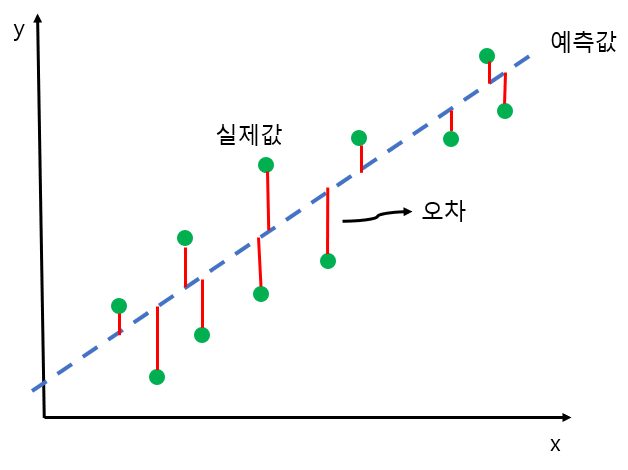

In [58]:
'''10'''

# 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)
y_pred

array([ 0.19818551,  0.23167461,  0.11153943,  0.98403614,  0.73898532,
        0.98253272,  0.644304  ,  0.11565922,  0.70924849,  0.86389715,
        0.33467223,  0.05379322,  0.50761195,  0.16244756,  0.18978113,
        0.98696396,  0.33545194,  0.67606348,  0.26021252,  0.38872162,
        0.07869762,  0.42099961,  0.54537988,  0.11336472,  0.13544943,
        0.13139047,  0.44004262,  0.26831907,  0.0954646 ,  0.60691445,
        0.10741826,  0.6000031 ,  0.47829671,  0.58256468,  0.1537437 ,
        0.19978893,  0.42527037,  0.64275854,  1.06323233,  0.1004794 ,
        0.19913075,  0.03879186,  0.12168288,  0.17006162,  0.63749837,
        0.07713134,  0.07632956,  0.09739727,  0.05768949,  0.35360687,
        0.78277027,  0.76506815, -0.0763493 ,  0.54449384,  0.0016056 ,
        1.02144277,  0.21350442,  0.90067043,  0.7695181 ,  0.64680572,
        0.09167079,  0.85956691,  0.72919933,  0.37402599,  0.1173255 ,
        0.63258565,  0.30154623,  0.09208211,  0.15517572,  0.83

<span style = "color:red"> 
Q4. 생존하면 1, 생존하지 못하면 0 이렇게 예측해주는 거 아니야? 머신러닝 성능 왜 이래??

In [ ]:
### 답
# 선형회귀가 연속적인 타깃을 예측하는 알고리즘이기 때문이다. 0과 1 사이 연속적인 값을 가지기 때문에 0, 1 과 같은 확실한 값을 낼 수 없음

In [60]:
'''11'''

# 성능 평가
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
print(f"Linear Regression MSE: {mse}") #오차 에러->작을수록 좋음

Linear Regression MSE: 0.13275583527356122


### 2. Decision Tree
- 의사결정 나무
- 분류 및 회귀 문제 모두에 사용됨 (ex. 어떤 고객이 우리 서비스를 이용하지 않을까?, 이 신용카드 거래 내역이 이상한데 사기 거래인가?)
- 데이터 특징에 따라 분할해 의사 결정을 시각적으로 표현
![image.png](https://blog.kakaocdn.net/dn/W530B/btqDdHICx9r/mk5iQYqHYDOrIrkADlMgH0/img.png)

In [64]:
'''12'''

# Model 적용
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
 
# 예측
y_pred = model.predict(X_val)

y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1])

In [66]:
'''13'''

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Decision Tree 정확도: {accuracy}")

Decision Tree 정확도: 0.7653631284916201


### 3. Logistic Regression
- 로지스틱 회귀
- 이진 분류 문제를 해결하는 데에 사용됨 (ex. 이메일이 스팸일까 아닐까?, 질병에 걸렸을까 안 걸렸을까?)
- 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고 분류하는 알고리즘
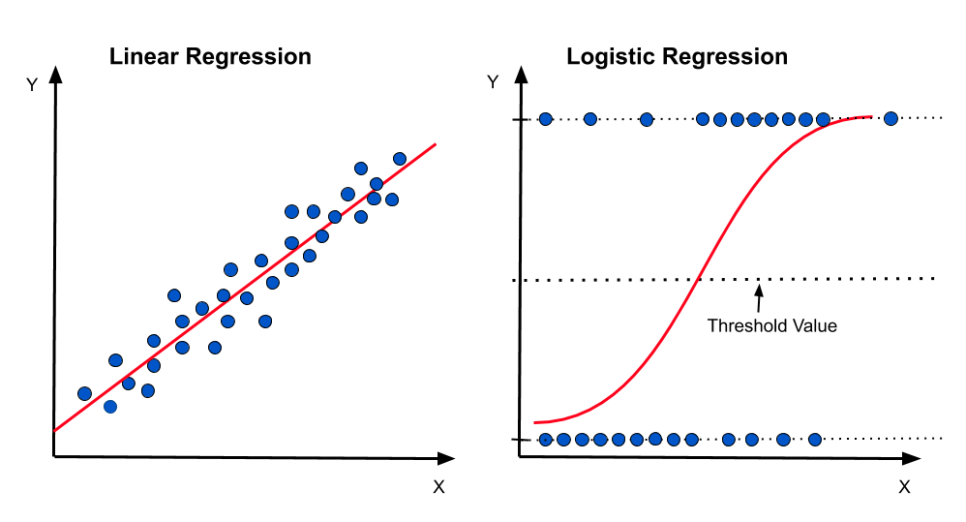

In [68]:
'''14'''

# Model 적용
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [70]:
'''15'''

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Logistic Regression 정확도: {accuracy}")

Logistic Regression 정확도: 0.7877094972067039


### 4. K-Nearest Neighbors, KNN
- K-최근접 이웃
- 분류 및 회귀 문제 모두에 사용됨 (ex. 이 사람한텐 어떤 걸 추천해줘야 할까?...)
- 새로운 데이터 포인트가 가장 가까운 K개의 데이터 포인트와 얼마나 유사한지를 기준으로 예측
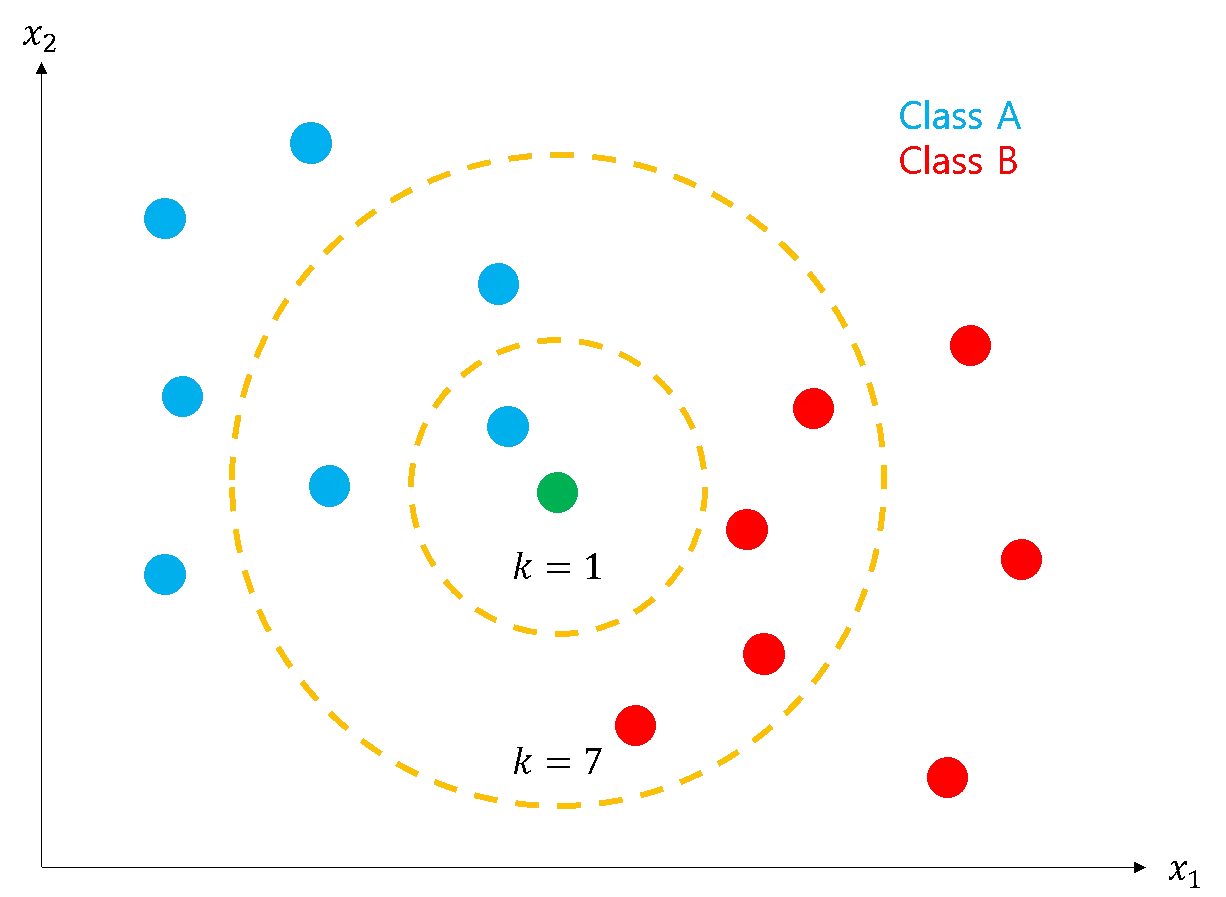

In [96]:
'''16'''

# Model 적용
model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors는 하이퍼파라미터로 조정 가능
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1])

In [98]:
'''17'''

# 정확도
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"KNN 정확도: {accuracy}")

KNN 정확도: 0.6201117318435754


In [100]:
'''18'''

a_index=list(range(1,11))
accuracies = []

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction = model.predict(X_val)
    accuracy = accuracy_score(y_val, prediction)
    accuracies.append(accuracy)

# 최대 정확도 출력
print(f'다양한 n 값에 따른 정확도: {accuracies}')
print(f'최대 정확도는 {max(accuracies)}이고, n_neighbors = {accuracies.index(max(accuracies)) + 1}입니다.')

다양한 n 값에 따른 정확도: [0.6033519553072626, 0.6089385474860335, 0.5921787709497207, 0.6145251396648045, 0.6201117318435754, 0.6145251396648045, 0.5921787709497207, 0.5921787709497207, 0.6089385474860335, 0.5921787709497207]
최대 정확도는 0.6201117318435754이고, n_neighbors = 5입니다.


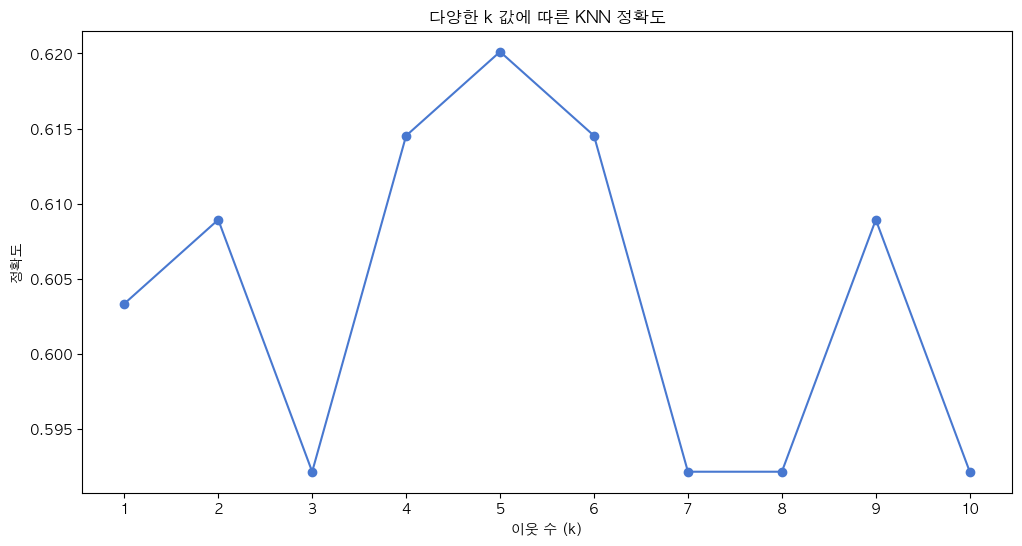

In [102]:
'''19'''

plt.figure(figsize=(12, 6))
plt.plot(a_index, accuracies, marker='o')
plt.xticks(a_index)
plt.xlabel('이웃 수 (k)')
plt.ylabel('정확도')
plt.title('다양한 k 값에 따른 KNN 정확도')
plt.show()

### 5. Random Forest
- 랜덤 포레스트
- 분류 및 회귀 문제 모두에 사용됨 (ex. 데이터를 분석해서 금융 사기인지 탐지해봐야겠어!, 이 사람이 질병에 걸렸을까? ...)
- 여러 개의 의사결정 나무를 앙상블 기법으로 결합하여 예측 성능을 향상시킴
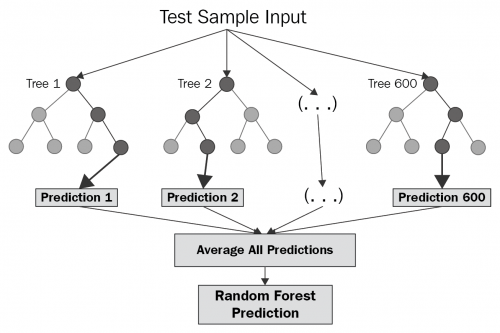

In [104]:
'''20'''

# Model 적용
model = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=RANDOM_STATE)  # n_estimators는 트리의 수
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0])

In [106]:
'''21'''

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest 정확도: {accuracy}")

Random Forest 정확도: 0.8044692737430168


In [108]:
'''22'''

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 하이퍼파라미터 그리드 설정
n_estimators = [5, 10, 50, 70, 100] 
max_depth = [None, 10, 20, 30]

hyper = {'n_estimators': n_estimators,
        'max_depth': max_depth}

# GridSearchCV를 사용한 랜덤 포레스트 하이퍼파라미터 튜닝
gd = GridSearchCV(estimator=RandomForestClassifier(random_state = RANDOM_STATE),param_grid = hyper)

gd.fit(X_train, y_train)

# 최적의 모델로 X_val 예측
best_model = gd.best_estimator_
y_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)

print("검증 세트에서의 정확도: ", accuracy)
print("최적의 모델: ", best_model)
print("최적의 하이퍼파라미터: ", gd.best_params_)

검증 세트에서의 정확도:  0.8212290502793296
최적의 모델:  RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
최적의 하이퍼파라미터:  {'max_depth': 10, 'n_estimators': 50}


## 검증하기 (K-fold Cross Validation)
**- Cross Validation(교차 검증):** Train 데이터의 모든 부분을 사용하여 모델을 검증하는 방법

**- K-fold:** Train 데이터를 K등분하고 나누어진 데이터를 K개로 다시 나누어 그 안에서 학습과 검증을 K번 반복해 평균을 구하는 검증 방법

<img src="https://miro.medium.com/v2/resize:fit:520/1*z3OmZ2Vp3uskfgLIZVIeTQ.jpeg" alt="Titanic  cat Image" width="300" /> 

In [114]:
'''23'''

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K = 5 의 K-Fold 설정
kfold = KFold(n_splits=5)
 
# Model 의 결과를 담을 List 생성
mean = []
accuracy = []
std = []
 
# 사용할 Model 명
classifiers = ['Logistic Regression',
               'Decision Tree',
               'K-Nearest Neighbors(K-NN)',
               'Random Forest']
 
# 사용할 Model 설정
models = [LogisticRegression(), 
          DecisionTreeClassifier(), 
          KNeighborsClassifier(), 
          RandomForestClassifier()] 

In [112]:
'''24'''

# 각 모델에 대해 K-Fold 교차 검증 수행
for model in models:
    cv_result = cross_val_score(model, X, y, cv = kfold, scoring='accuracy')
    mean.append(cv_result.mean())
    std.append(cv_result.std())
    
# Model 별 accuracy 평균과 표준편차
results = pd.DataFrame({'CV Mean': mean, 'Std': std}, index=classifiers)
results

,CV Mean,Std
Logistic Regression,0.785626,0.028792
Decision Tree,0.760969,0.078930
K-Nearest Neighbors(K-NN),0.595907,0.046991
Random Forest,0.830550,0.026277


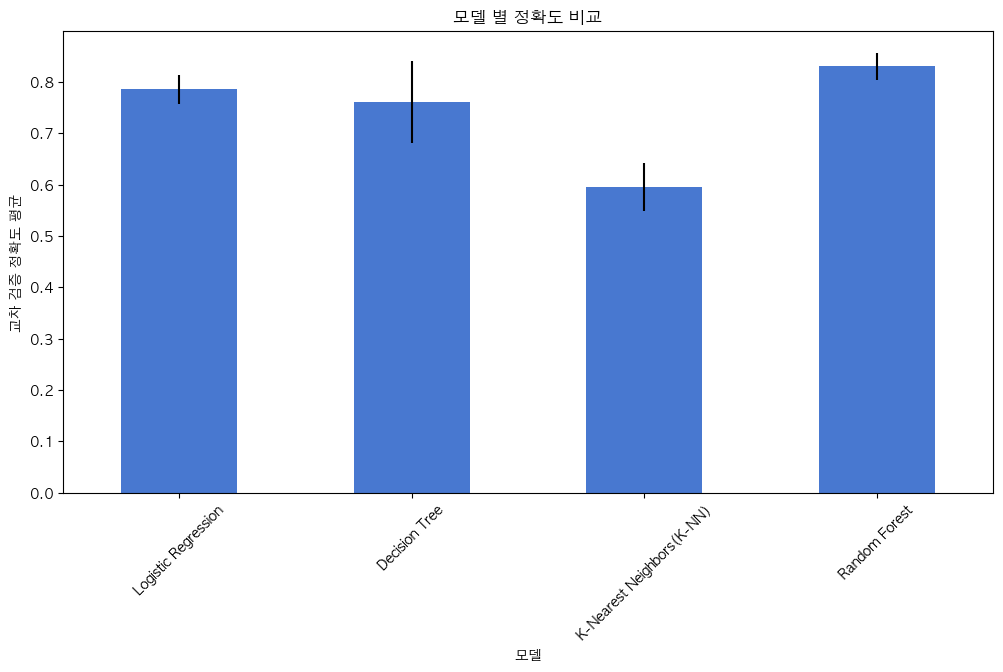

In [116]:
'''25'''

# 정확도 결과를 시각화
plt.figure(figsize=(12, 6))
results['CV Mean'].plot(kind='bar', yerr=results['Std'])
plt.title('모델 별 정확도 비교')
plt.xlabel('모델')
plt.ylabel('교차 검증 정확도 평균')
plt.xticks(rotation=45)
plt.show()

<span style = "color:red"> 
Q4. 이걸로 내 성적이 결정된다고 할 때!! 어떤 모델을 선택할래??

In [ ]:
### 자신의 생각
# Random Forest 교차 검증 정확도가 높기 때문에
#검은색 선 = 표준편차 -> 길면 랜덤함, 짧을수록 정확